# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

## Forecasting 2017 sales based on data from recent years

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [2]:
# Load the 
games = pd.read_csv('/datasets/games.csv')

In [3]:
# Display basic information about the dataset
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
games.shape

(16715, 11)

In [6]:
# Check for duplicate entries
games.duplicated().sum()

0

In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job so far.

</div>

### Key Questions to Answer:
- What's the total number of records in our dataset? 16715, 11
- What data types are present in each column? object and float64
- Are there any obvious issues with the data? missing data
- Do we see any immediate patterns or anomalies? Game might be too niche, indie, or old

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [8]:
# Convert column names to lowercase
games.columns = games.columns.str.lower()

In [9]:
# Verify the changes
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 2.2 Data Type Conversion

In [10]:
# Check current data types
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
# Make changes to data types if necessary
# Describe the columns where the data types have been changed and why.
games['year_of_release'] = games['year_of_release'].astype('Int64') 
games['user_score'] = pd.to_numeric(games['user_score'], errors= 'coerce')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [12]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
missing_percentage = (games['year_of_release'].isna().sum() / len(games)) * 100
print(f"Missing values: {missing_percentage:.2f}%")

Missing values: 1.61%


In [14]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
tbd_mask = games.applymap(lambda x: isinstance(x, str) and 'tbd' in x.lower())

# Check if 'tbd' exists anywhere in the DataFrame
if tbd_mask.any().any():
    print("\n'tbd' (case-insensitive) found in the DataFrame.")
else:
    print("\n'tbd' (case-insensitive) not found in the DataFrame.")
   
print("\nCells containing 'tbd' (case-insensitive):")
print(games[tbd_mask])



'tbd' (case-insensitive) not found in the DataFrame.

Cells containing 'tbd' (case-insensitive):
      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
0      NaN      NaN             <NA>   NaN       NaN       NaN       NaN   
1      NaN      NaN             <NA>   NaN       NaN       NaN       NaN   
2      NaN      NaN             <NA>   NaN       NaN       NaN       NaN   
3      NaN      NaN             <NA>   NaN       NaN       NaN       NaN   
4      NaN      NaN             <NA>   NaN       NaN       NaN       NaN   
...    ...      ...              ...   ...       ...       ...       ...   
16710  NaN      NaN             <NA>   NaN       NaN       NaN       NaN   
16711  NaN      NaN             <NA>   NaN       NaN       NaN       NaN   
16712  NaN      NaN             <NA>   NaN       NaN       NaN       NaN   
16713  NaN      NaN             <NA>   NaN       NaN       NaN       NaN   
16714  NaN      NaN             <NA>   NaN       NaN       NaN    

### 2.3 Handling Missing Values

In [15]:
# Examine missing values
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [16]:
# Calculate percentage of missing values
games.isnull().mean() * 100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

In [17]:
# Analyze patterns in missing values
games['critic_score'].isnull().groupby(games['year_of_release']).sum()

year_of_release
1980      9
1981     46
1982     36
1983     17
1984     14
1985     13
1986     21
1987     16
1988     14
1989     17
1990     16
1991     41
1992     42
1993     62
1994    120
1995    219
1996    255
1997    272
1998    351
1999    299
2000    207
2001    156
2002    202
2003    190
2004    201
2005    284
2006    386
2007    505
2008    712
2009    775
2010    755
2011    636
2012    332
2013    271
2014    320
2015    381
2016    270
Name: critic_score, dtype: int64

In [18]:
games['user_score'].isnull().groupby(games['year_of_release']).sum()

year_of_release
1980      9
1981     46
1982     36
1983     17
1984     14
1985     13
1986     21
1987     16
1988     14
1989     17
1990     16
1991     41
1992     42
1993     62
1994    120
1995    219
1996    255
1997    271
1998    348
1999    307
2000    243
2001    225
2002    365
2003    259
2004    273
2005    356
2006    454
2007    568
2008    766
2009    812
2010    788
2011    635
2012    314
2013    240
2014    252
2015    309
2016    240
Name: user_score, dtype: int64

In [19]:
games['critic_score'].isnull().groupby(games['platform']).sum() # handheld or older game consoles are missing more critic scores 

platform
2600     133
3DO        3
3DS      352
DC        38
DS      1434
GB        98
GBA      384
GC       108
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       259
PCFX       1
PS       997
PS2      863
PS3      511
PS4      140
PSP      747
PSV      310
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii      735
WiiU      57
X360     346
XB        99
XOne      78
Name: critic_score, dtype: int64

In [20]:
pre_esrb = games[games['year_of_release'] < 1994]
post_esrb = games[games['year_of_release'] >= 1994] # i did this to check if most missing values were from before esrb was a thing 

print("PRE-1994 (before ESRB existed):")
print(f"Total games: {len(pre_esrb)}")
print(f"Missing ratings: {pre_esrb['rating'].isnull().sum()}")
print(f"Percentage missing: {(pre_esrb['rating'].isnull().sum() / len(pre_esrb)) * 100:.1f}%")

print("\nPOST-1994 (after ESRB established):")
print(f"Total games: {len(post_esrb)}")
print(f"Missing ratings: {post_esrb['rating'].isnull().sum()}")
print(f"Percentage missing: {(post_esrb['rating'].isnull().sum() / len(post_esrb)) * 100:.1f}%")

PRE-1994 (before ESRB existed):
Total games: 367
Missing ratings: 363
Percentage missing: 98.9%

POST-1994 (after ESRB established):
Total games: 16079
Missing ratings: 6315
Percentage missing: 39.3%


In [21]:
# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy
games.dropna(subset=['year_of_release'], inplace=True)
games.info() # I dropped games that didn't have a year of release becasue im looking for sales from the last few years before 2017


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [22]:
# Why do you think the values are missing? Give possible reasons.
# Explain why you filled in the missing values as you did or why you decided to leave them blank. 


I think Unrated games: Some indie or very old games never went through formal rating process. Year_of_Release: Poor record-keeping for very old games, or unreleased games in dataset
I decided to leave the missing values from critic_score and user_score blank(NaN) because i have enough values to use and i didn't want to skew the results by filling them in.
i created unrated so i could look at sales with ratings vs without.

### 2.4 Calculate Total Sales

In [23]:
# Calculate total sales across all regions and put them in a different column
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [24]:
# Create a DataFrame with game releases by year
releases_by_year = games['year_of_release'].value_counts().sort_index()
releases_by_year

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64

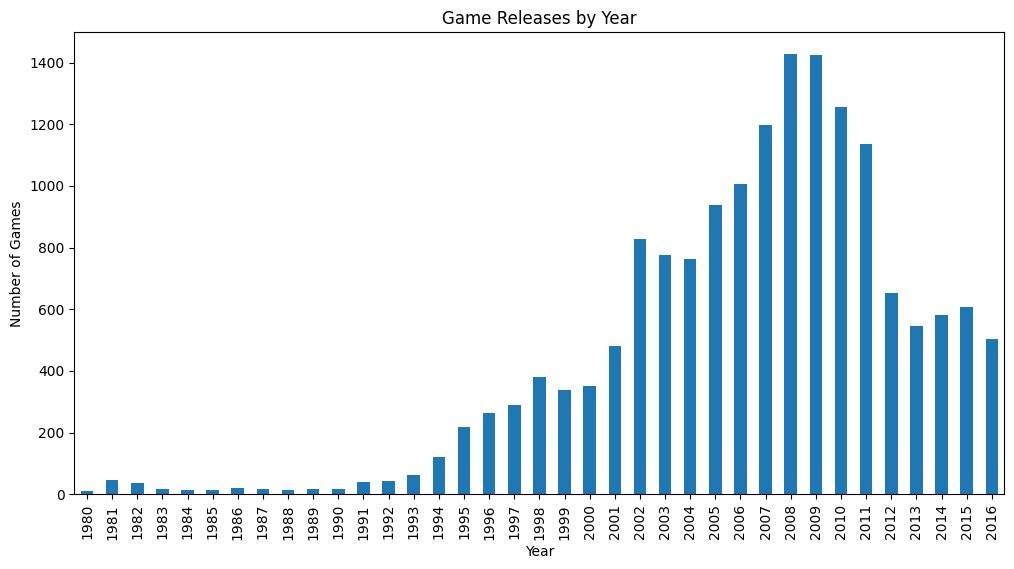

In [25]:
# Visualize the distribution of games across years
plt.figure(figsize=(12, 6))
releases_by_year.plot(kind='bar')
plt.title('Game Releases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()

In [26]:
# Display summary statistics for each year
games.groupby('year_of_release').describe()

na_sales                                                   \
                   count      mean       std   min     25%    50%     75%   
year_of_release                                                             
1980                 9.0  1.176667  1.282624  0.22  0.3200  0.720  1.0700   
1981                46.0  0.726087  0.730885  0.12  0.2925  0.435  0.8925   
1982                36.0  0.747778  1.172248  0.13  0.3150  0.500  0.7225   
1983                17.0  0.456471  0.278903  0.01  0.3100  0.430  0.5100   
1984                14.0  2.377143  7.089785  0.00  0.0450  0.345  0.7700   
1985                14.0  2.409286  7.689309  0.00  0.0000  0.285  0.6025   
1986                21.0  0.595238  0.881542  0.00  0.0000  0.320  0.7100   
1987                16.0  0.528750  0.653094  0.00  0.1350  0.370  0.4875   
1988                15.0  1.591333  2.630154  0.00  0.1000  0.590  1.3700   
1989                17.0  2.655882  5.893720  0.00  0.1400  0.660  0.9600   
1990                16.0  1.591250  3.087251  0.00  0.2300  0.675  1.7325   
1991                41.0  0.311220  0.643619  0.00  0.0000  0.000  0.4100   
1992                43.0  0.788140  1.359452  0.00  0.0000  0.020  1.1000   
1993                62.0  0.272581  0.841223  0.00  0.0000  0.000  0.0775   
1994               121.0  0.232727  0.611660  0.00  0.0000  0.000  0.0200   
1995               219.0  0.113379  0.347959  0.00  0.0000  0.000  0.0400   
1996               263.0  0.329886  1.007959  0.00  0.0000  0.040  0.1650   
1997               289.0  0.327855  0.711767  0.00  0.0000  0.070  0.2900   
1998               379.0  0.338681  0.646139  0.00  0.0100  0.080  0.3600   
1999               338.0  0.372959  0.788408  0.00  0.0200  0.130  0.3575   
2000               350.0  0.270000  0.457221  0.00  0.0200  0.100  0.2875   
2001               482.0  0.360954  0.734771  0.00  0.0325  0.115  0.3300   
2002               829.0  0.260784  0.561713  0.00  0.0300  0.090  0.2300   
2003               775.0  0.249819  0.402497  0.00  0.0400  0.110  0.2600   
2004               762.0  0.292008  0.611504  0.00  0.0400  0.110  0.3275   
2005               939.0  0.257881  0.590938  0.00  0.0400  0.100  0.2600   
2006              1006.0  0.260567  1.478435  0.00  0.0000  0.050  0.1900   
2007              1197.0  0.258889  0.608283  0.00  0.0000  0.090  0.2700   
2008              1427.0  0.244352  0.631926  0.00  0.0100  0.090  0.2500   
2009              1426.0  0.235309  0.760085  0.00  0.0000  0.090  0.2100   
2010              1255.0  0.239562  0.732948  0.00  0.0000  0.080  0.1900   
2011              1136.0  0.210202  0.580080  0.00  0.0000  0.060  0.1700   
2012               653.0  0.234701  0.626764  0.00  0.0000  0.050  0.2100   
2013               544.0  0.282445  0.777533  0.00  0.0000  0.045  0.2400   
2014               581.0  0.227659  0.515008  0.00  0.0000  0.050  0.2000   
2015               606.0  0.176337  0.487092  0.00  0.0000  0.020  0.1300   
2016               502.0  0.089502  0.258167  0.00  0.0000  0.010  0.0500   

                       eu_sales            ... user_score      total_sales  \
                   max    count      mean  ...        75%  max       count   
year_of_release                            ...                               
1980              4.00      9.0  0.074444  ...        NaN  NaN         9.0   
1981              4.21     46.0  0.042609  ...        NaN  NaN        46.0   
1982              7.28     36.0  0.045833  ...        NaN  NaN        36.0   
1983              1.22     17.0  0.047059  ...        NaN  NaN        17.0   
1984             26.93     14.0  0.150000  ...        NaN  NaN        14.0   
1985             29.08     14.0  0.338571  ...       5.80  5.8        14.0   
1986              3.74     21.0  0.135238  ...        NaN  NaN        21.0   
1987              2.19     16.0  0.088125  ...        NaN  NaN        16.0   
1988              9.54     15.0  0.439333  ...       2.20  2.2        15.0   

In [27]:
games.groupby('year_of_release')['name'].count().describe()

count      37.000000
mean      444.432432
std       451.604334
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: name, dtype: float64

### Questions to Consider:
- Which years show significant numbers of game releases? 2006 to 2011
- Are there any notable trends or patterns in the number of releases? game releases tend to have less when new console releases then starts to release more until end of console life cycle.
- Is there enough recent data to make predictions for 2017? yes 2013 to 2015 is showing the same life cycle pattern

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [28]:
# Calculate total sales by platform and year
total_year_platform = games.groupby(['platform', 'year_of_release'])['total_sales'].sum()
total_year_platform

platform  year_of_release
2600      1980               11.38
          1981               35.68
          1982               28.88
          1983                5.84
          1984                0.27
                             ...  
XB        2008                0.18
XOne      2013               18.96
          2014               54.07
          2015               60.14
          2016               26.15
Name: total_sales, Length: 238, dtype: float64

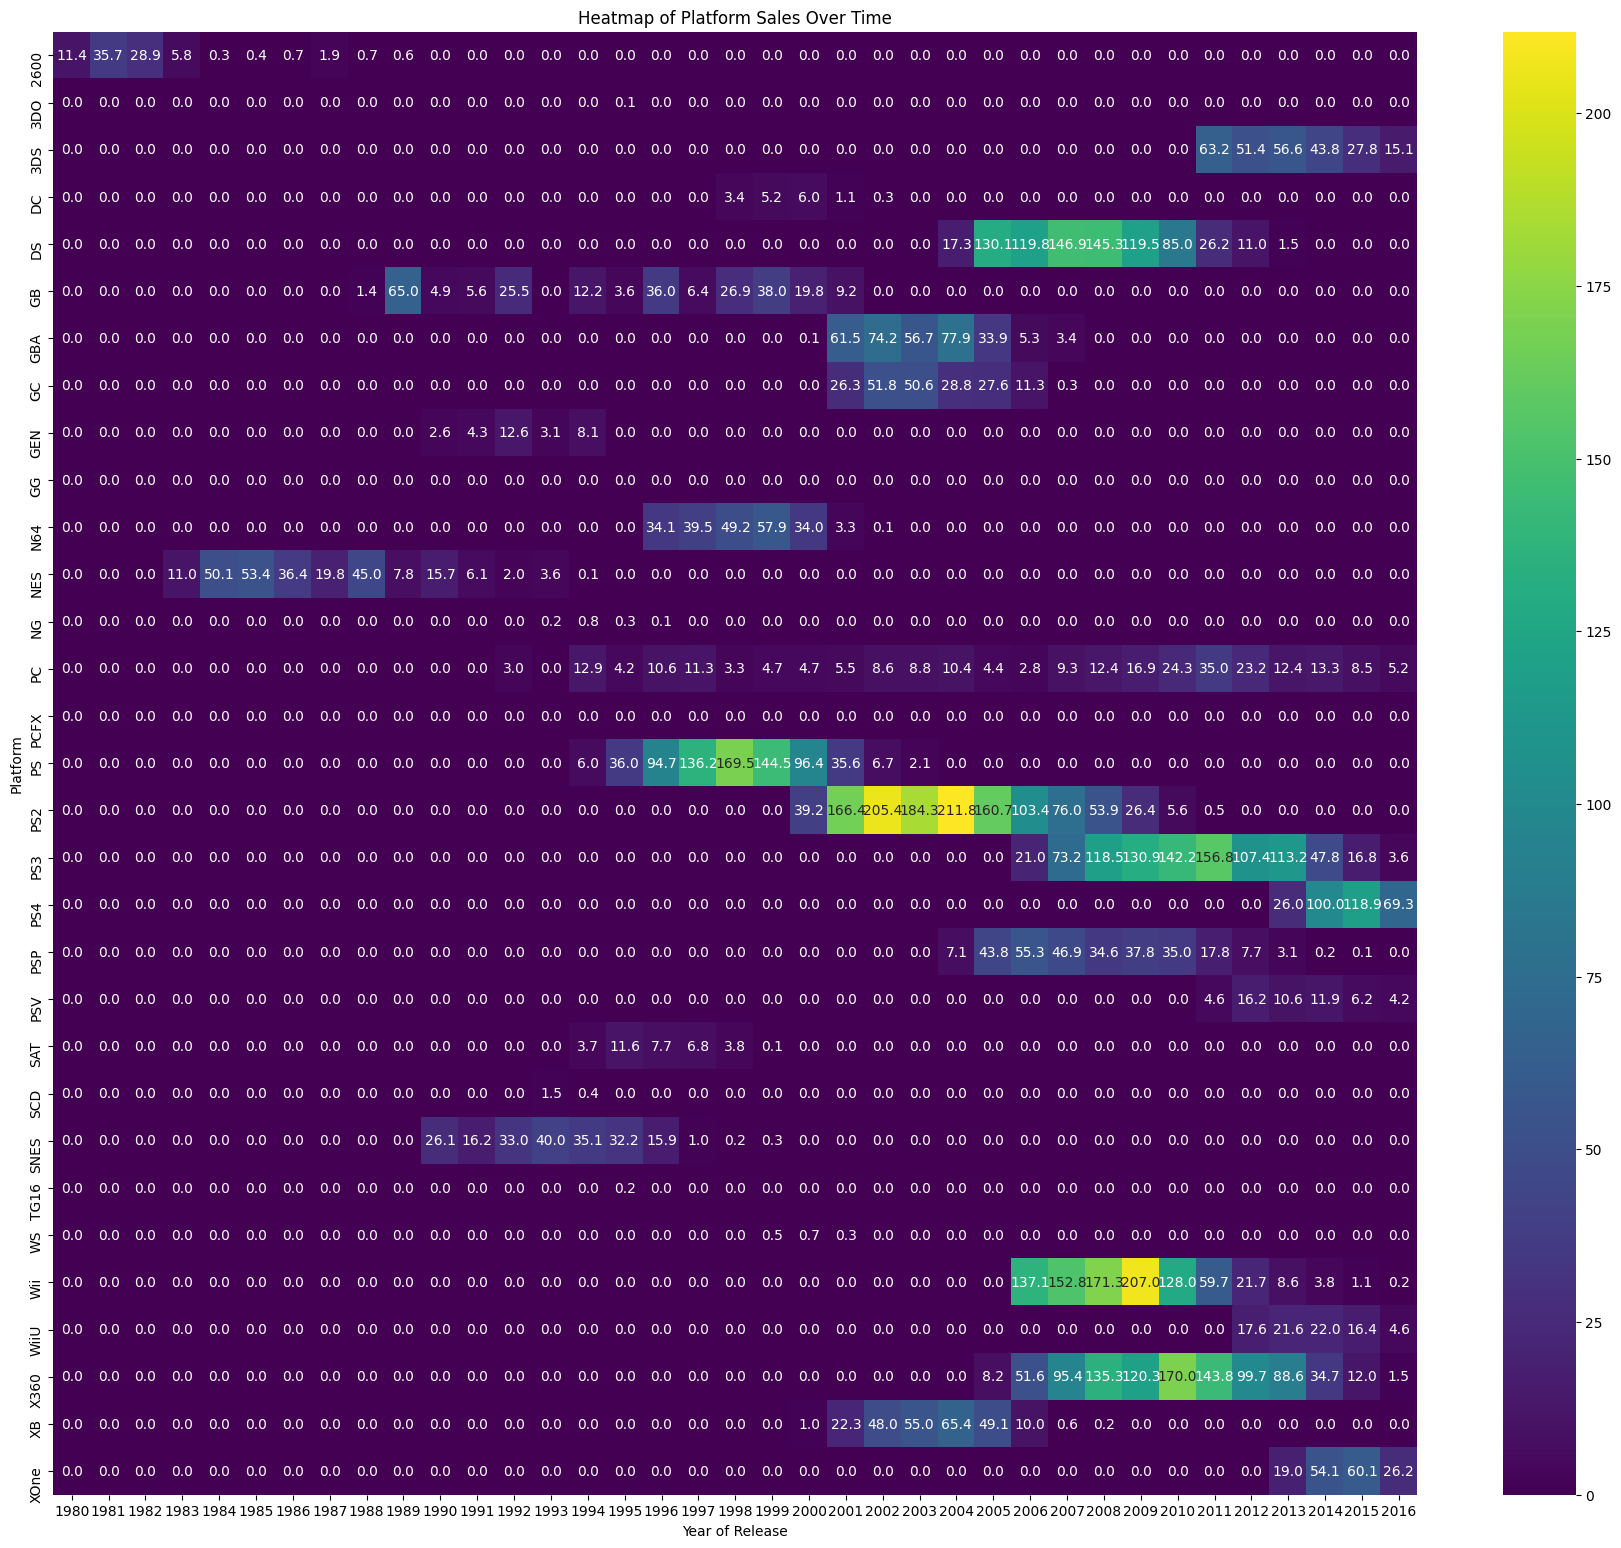

In [29]:
# Create a heatmap of platform sales over time
total_year_platform_pivot = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack(fill_value=0)
plt.figure(figsize=(22, 19)) 
sns.heatmap(total_year_platform_pivot, annot=True, cmap='viridis', fmt=".1f")
plt.title('Heatmap of Platform Sales Over Time')
plt.xlabel('Year of Release')
plt.ylabel('Platform')
plt.show()

In [30]:
# Identify platforms with declining sales
platform_trends = total_year_platform_pivot.pct_change(axis=1)
platform_trends

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,NaN,2.135325,-0.190583,-0.797784,-0.953767,0.666667,0.488889,1.895522,-0.618557,-0.148649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,inf,-0.187342,0.101441,-0.226445,-0.365174,-0.455004
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,inf,1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,inf,-1.000000,NaN,NaN,NaN,...,0.226442,-0.011093,-0.177345,-0.288774,-0.692072,-0.579450,-0.860127,-1.000000,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf,44.433566,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.356061,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.976021,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Questions to Consider:
- Which platforms show consistent sales over time? no console is consistant they have big spike at beginning then decrease every year after.
- Can you identify platforms that have disappeared from the market? the only consoles still relevant are 3DS, PC, PS3, PS4, PSP, PSV, Wii, WiiU, X360, and XOne
- What's the typical lifecycle of a gaming platform? 5 to 7 years

## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [31]:
# Your code here to filter the dataset to relevant years
# Example:
# relevant_years = [XXXX, XXXX, XXXX] # Replace with your chosen years
# df_relevant = df[df['year_of_release'].isin(relevant_years)]

# Justify your choice with data

In [32]:
relevant_years = [2016, 2015, 2014, 2013]
games_relevant = games[games['year_of_release'].isin(relevant_years)]
games_relevant

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### Document Your Decision:
- What years did you select and why? I picked these years because the life cycle of a console is 5-6 years 
- How does this period reflect current market conditions? They are going downward 
- What factors influenced your decision? Console life and recency 

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [33]:
# Analyze platform sales trends
sales_trend_recent = games_relevant.groupby(['platform', 'year_of_release'])['total_sales'].sum()
sales_trend_recent

platform  year_of_release
3DS       2013                56.57
          2014                43.76
          2015                27.78
          2016                15.14
DS        2013                 1.54
PC        2013                12.38
          2014                13.28
          2015                 8.52
          2016                 5.25
PS3       2013               113.25
          2014                47.76
          2015                16.82
          2016                 3.60
PS4       2013                25.99
          2014               100.00
          2015               118.90
          2016                69.25
PSP       2013                 3.14
          2014                 0.24
          2015                 0.12
PSV       2013                10.59
          2014                11.90
          2015                 6.25
          2016                 4.25
Wii       2013                 8.59
          2014                 3.75
          2015                 1.14
  

In [34]:
recent_years = total_year_platform_pivot[[2013, 2014, 2015]]
platform_decline = ((recent_years[2015] - recent_years[2013]) / recent_years[2013] * 100).round(2)
platform_decline = platform_decline.sort_values()
print("Platform changes from 2013 to 2015 (% change):")
print(platform_decline)


Platform changes from 2013 to 2015 (% change):
platform
DS     -100.00
PSP     -96.18
Wii     -86.73
X360    -86.50
PS3     -85.15
3DS     -50.89
PSV     -40.98
PC      -31.18
WiiU    -24.48
XOne    217.19
PS4     357.48
2600       NaN
3DO        NaN
DC         NaN
GB         NaN
GBA        NaN
GC         NaN
GEN        NaN
GG         NaN
N64        NaN
NES        NaN
NG         NaN
PCFX       NaN
PS         NaN
PS2        NaN
SAT        NaN
SCD        NaN
SNES       NaN
TG16       NaN
WS         NaN
XB         NaN
dtype: float64


In [35]:
recent_trends = recent_years.pct_change(axis=1) * 100
print("\nYear-over-year changes:")
print(recent_trends.round(2))


Year-over-year changes:
year_of_release  2013    2014   2015
platform                            
2600              NaN     NaN    NaN
3DO               NaN     NaN    NaN
3DS               NaN  -22.64 -36.52
DC                NaN     NaN    NaN
DS                NaN -100.00    NaN
GB                NaN     NaN    NaN
GBA               NaN     NaN    NaN
GC                NaN     NaN    NaN
GEN               NaN     NaN    NaN
GG                NaN     NaN    NaN
N64               NaN     NaN    NaN
NES               NaN     NaN    NaN
NG                NaN     NaN    NaN
PC                NaN    7.27 -35.84
PCFX              NaN     NaN    NaN
PS                NaN     NaN    NaN
PS2               NaN     NaN    NaN
PS3               NaN  -57.83 -64.78
PS4               NaN  284.76  18.90
PSP               NaN  -92.36 -50.00
PSV               NaN   12.37 -47.48
SAT               NaN     NaN    NaN
SCD               NaN     NaN    NaN
SNES              NaN     NaN    NaN
TG16         

In [36]:
# Sort platforms by total sales
platform_total_sales = total_year_platform_pivot.sum(axis=1).sort_values(ascending=False)
print("Platforms ranked by total sales:")
print(platform_total_sales)

Platforms ranked by total sales:
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
dtype: float64


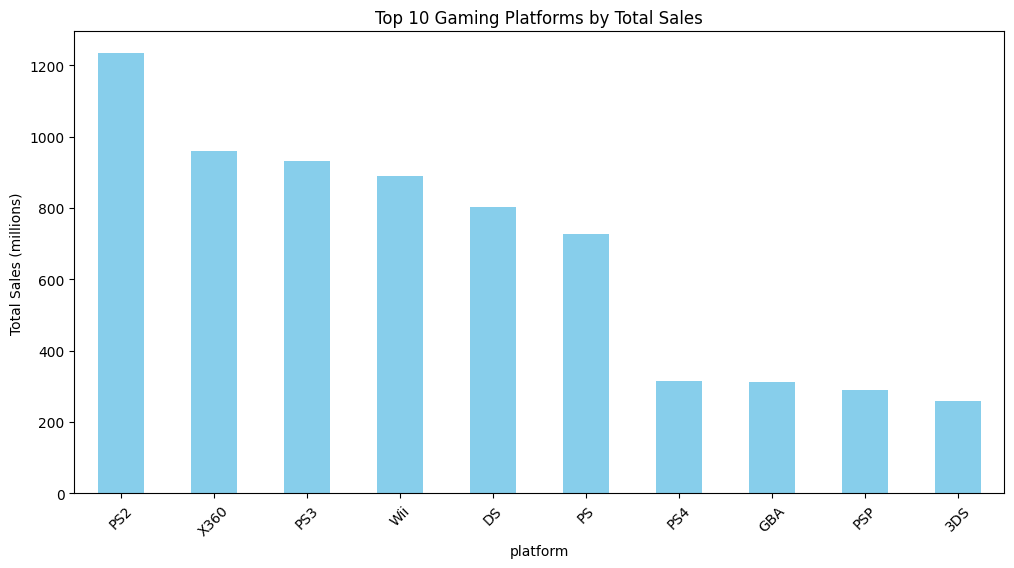

In [37]:
top_platforms = platform_total_sales.head(10)
plt.figure(figsize=(12, 6))
top_platforms.plot(kind='bar', color='skyblue')
plt.title('Top 10 Gaming Platforms by Total Sales')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.show()


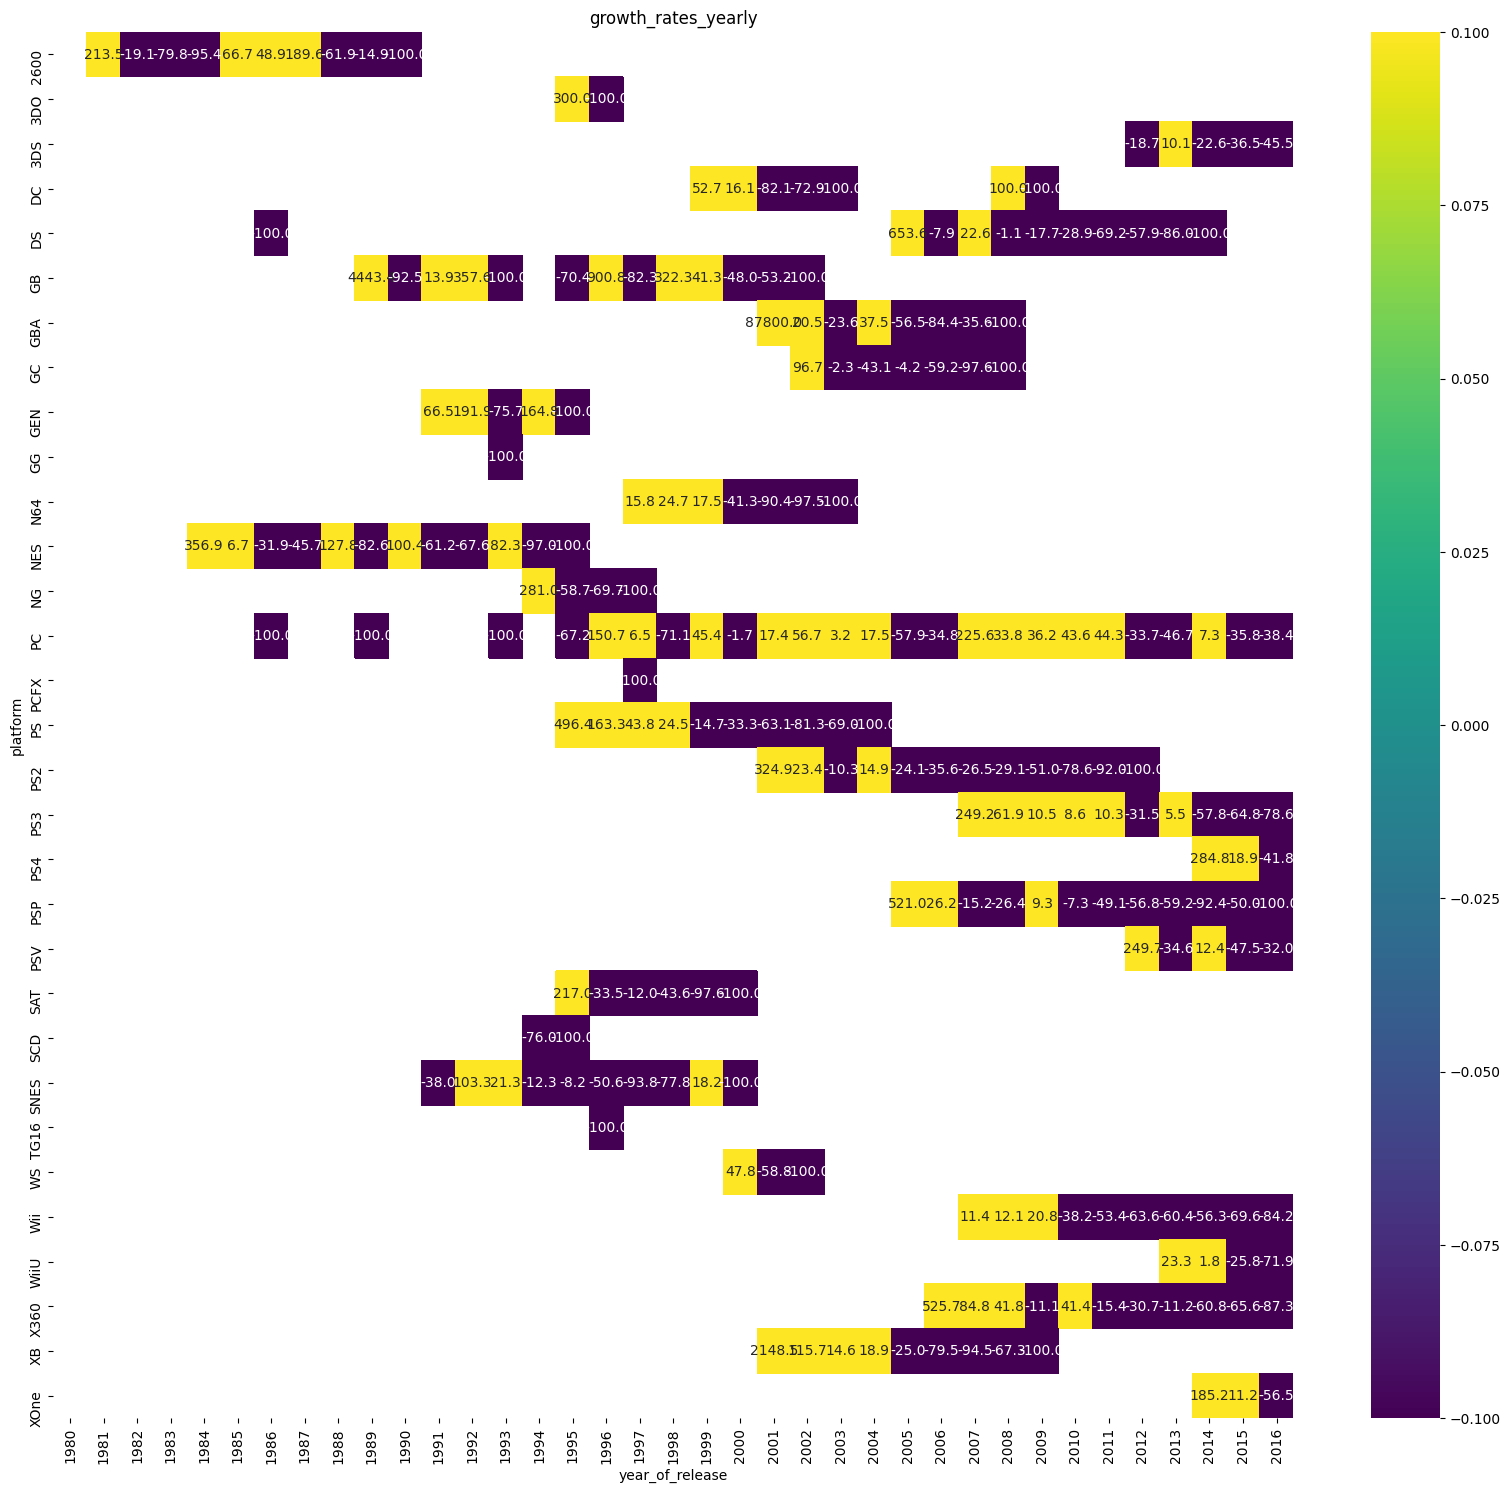

In [38]:
# Visualize top platforms
# Calculate year-over-year growth for each platform
# Your code here to calculate and visualize platform growth rates
growth_rates = total_year_platform_pivot.pct_change(axis=1) * 100 

plt.figure(figsize=(20,18))
sns.heatmap(growth_rates, annot=True, cmap='viridis', fmt=".1f")
plt.title('growth_rates_yearly')
plt.show()


## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

<Figure size 1200x600 with 0 Axes>

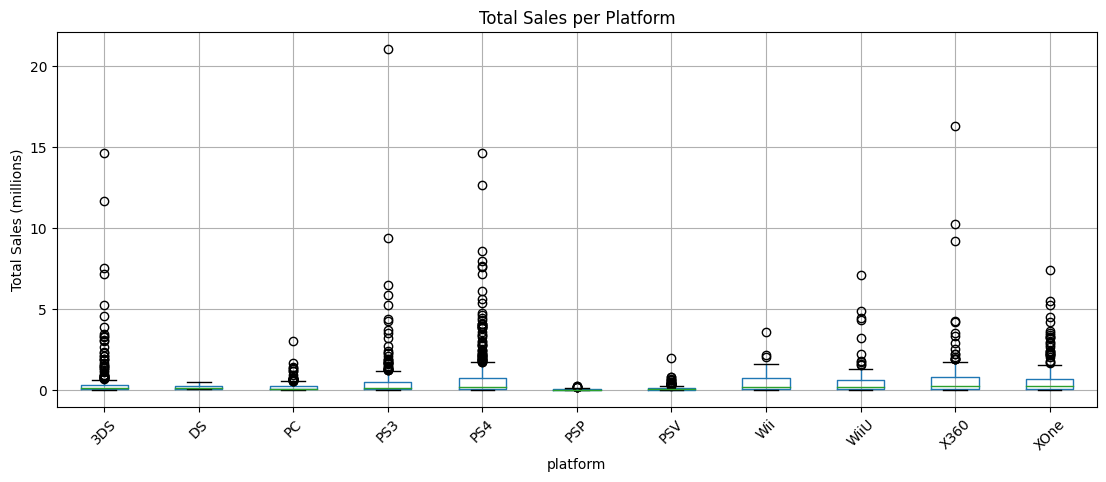

In [68]:
# Create box plot of sales by platform
plt.figure(figsize=(12, 6))
games_relevant.boxplot(column='total_sales', by='platform', figsize=(13, 5))
plt.title('Total Sales per Platform')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.suptitle('')  # Remove the automatic title
plt.show()

In [40]:
# Calculate detailed statistics for each platform
platform_stats = total_year_platform_pivot.T.describe().T
platform_stats # Shows that most platforms have a few games that do really good and a lot that don't shown by the high std. The most conistant is PC 

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,37.0,2.337297,7.590253,0.0,0.0,0.00,0.27,35.68
3DO,37.0,0.002703,0.013468,0.0,0.0,0.00,0.00,0.08
3DS,37.0,6.967838,17.441778,0.0,0.0,0.00,0.00,63.20
DC,37.0,0.431081,1.377249,0.0,0.0,0.00,0.00,5.99
DS,37.0,21.696757,46.905621,0.0,0.0,0.00,1.54,146.94
GB,37.0,6.876486,14.261188,0.0,0.0,0.00,5.57,64.97
GBA,37.0,8.456216,21.799124,0.0,0.0,0.00,0.00,77.91
GC,37.0,5.317027,13.554153,0.0,0.0,0.00,0.00,51.81
GEN,37.0,0.831622,2.556100,0.0,0.0,0.00,0.00,12.64


## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [41]:
# Choose a popular platform based on your previous analysis

ps3_reviews = games_relevant[games_relevant['platform'] == 'PS3']
ps3_reviews


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,NaN,NaN,NaN,5.27
...,...,...,...,...,...,...,...,...,...,...,...,...
16558,Naruto Shippuden: Ultimate Ninja Storm Collection,PS3,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16638,Tour de France 2014,PS3,2014,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


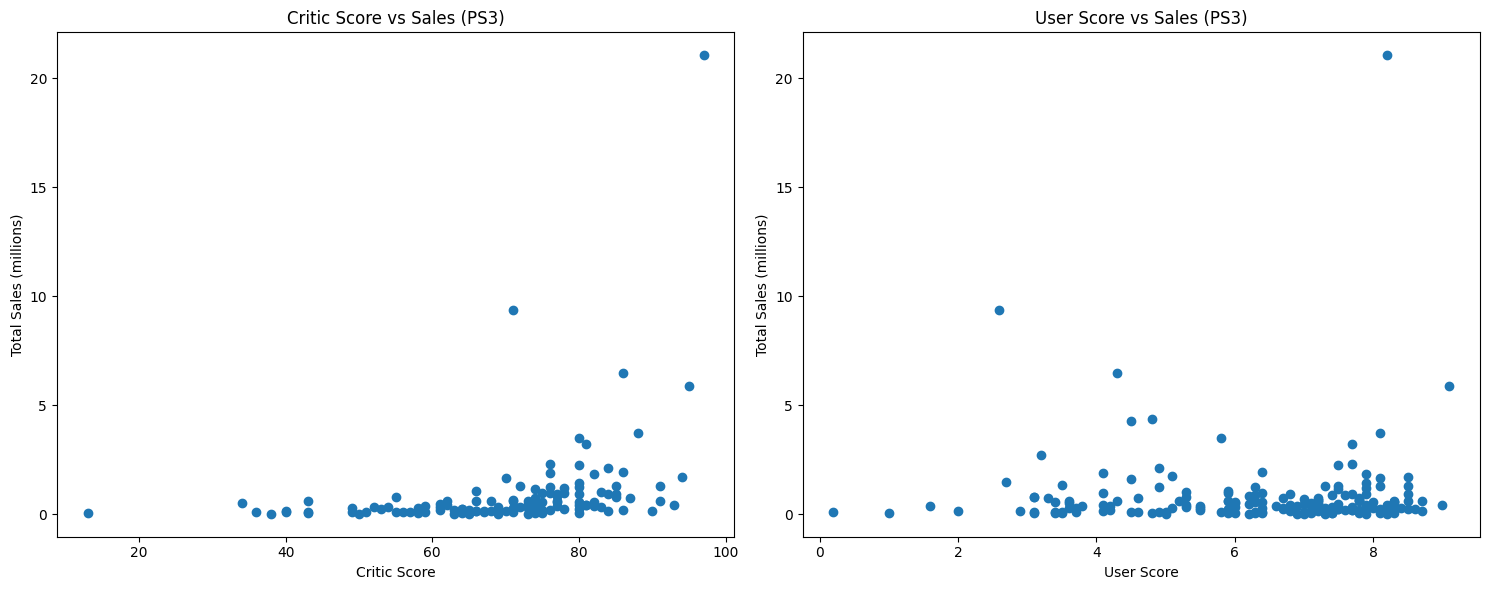

In [42]:
# Create scatter plots for both critic and user scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.scatter(ps3_reviews['critic_score'], ps3_reviews['total_sales'])
ax1.set_xlabel('Critic Score')
ax1.set_ylabel('Total Sales (millions)')
ax1.set_title('Critic Score vs Sales (PS3)')

# User Score vs Sales  
ax2.scatter(ps3_reviews['user_score'], ps3_reviews['total_sales']) # i think jupyter notebook didnt save the change because it was working beforehand when i tested everything sorry
ax2.set_xlabel('User Score')
ax2.set_ylabel('Total Sales (millions)')
ax2.set_title('User Score vs Sales (PS3)')

plt.tight_layout()
plt.show()

In [43]:
# Critic Scores
critic_correlation = ps3_reviews['critic_score'].corr(ps3_reviews['total_sales'])

# User Scores
user_correlation = ps3_reviews['user_score'].corr(ps3_reviews['total_sales'])

# Calculate correlations
print(f"Critic Score vs Sales correlation: {critic_correlation:.3f}")
print(f"User Score vs Sales correlation: {user_correlation:.3f}")

Critic Score vs Sales correlation: 0.334
User Score vs Sales correlation: 0.002


This shows critic score has a moderate correlation and user score has essentially no correlation critic score is the only real impact

## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [44]:
# Find games released on multiple platforms
multiple_platforms = games_relevant.groupby('name').size()
multiple_platforms = multiple_platforms[multiple_platforms > 1]
multi_platform_games = multiple_platforms.index.tolist()
multi_platform_data = games_relevant[games_relevant['name'].isin(multi_platform_games)]
multi_platform_data


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Average Total Sales by Platform:


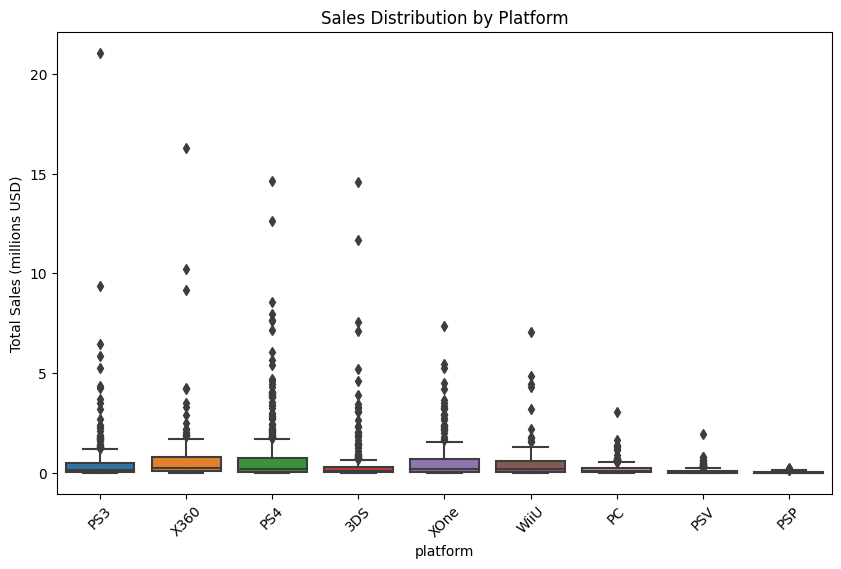

In [64]:
# Compare sales across platforms for these games
# Your code here to analyze and visualize cross-platform performance
platform_sales = multi_platform_data.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print("Average Total Sales by Platform:")
platform_counts = games_relevant['platform'].value_counts()
major_platforms = platform_counts[platform_counts >= 50].index  # Adjust threshold as needed
games_major = games_relevant[games_relevant['platform'].isin(major_platforms)]
plt.figure(figsize=(10, 6))
sns.boxplot(data=games_major, x='platform', y='total_sales')
plt.xticks(rotation=45)
plt.title('Sales Distribution by Platform')
plt.ylabel('Total Sales (millions USD)')
plt.show()

NES and Game Boy have:
Fewer outliers (fewer individual points beyond the whiskers)
Bigger quartile ranges (taller boxes)
Bigger whisker heights
other consoles have:
More outliers (fewer individual points beyond the whiskers)
Smaller quartile ranges (taller boxes)
Smaller whisker heights

## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [46]:
# Analyze genre performance
genre_performance = games.groupby('genre').agg({
    'total_sales': ['mean', 'median', 'std', 'count'],
    'na_sales': 'mean',
    'eu_sales': 'mean', 
    'jp_sales': 'mean',
    'other_sales': 'mean'
}).round(2)

print("Average Sales Performance by Genre:")
print("=" * 50)
print(genre_performance)

Average Sales Performance by Genre:
             total_sales                    na_sales eu_sales jp_sales  \
                    mean median   std count     mean     mean     mean   
genre                                                                    
Action              0.52   0.19  1.15  3307     0.26     0.15     0.05   
Adventure           0.18   0.05  0.51  1293     0.08     0.05     0.04   
Fighting            0.53   0.21  0.95   837     0.26     0.12     0.10   
Misc                0.46   0.16  1.31  1721     0.23     0.12     0.06   
Platform            0.94   0.27  2.59   878     0.51     0.23     0.15   
Puzzle              0.42   0.10  1.58   569     0.21     0.09     0.10   
Racing              0.59   0.19  1.67  1226     0.29     0.19     0.05   
Role-Playing        0.63   0.18  1.72  1481     0.22     0.13     0.24   
Shooter             0.80   0.24  1.83  1296     0.45     0.24     0.03   
Simulation          0.45   0.15  1.20   857     0.21     0.13     0.07   
Sp

In [47]:
# Sort genres by total sales
genre_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(genre_sales)

genre
Action          1716.52
Sports          1309.67
Shooter         1041.36
Role-Playing     931.08
Platform         825.55
Misc             790.29
Racing           723.49
Fighting         442.66
Simulation       387.96
Puzzle           239.89
Adventure        233.33
Strategy         172.57
Name: total_sales, dtype: float64


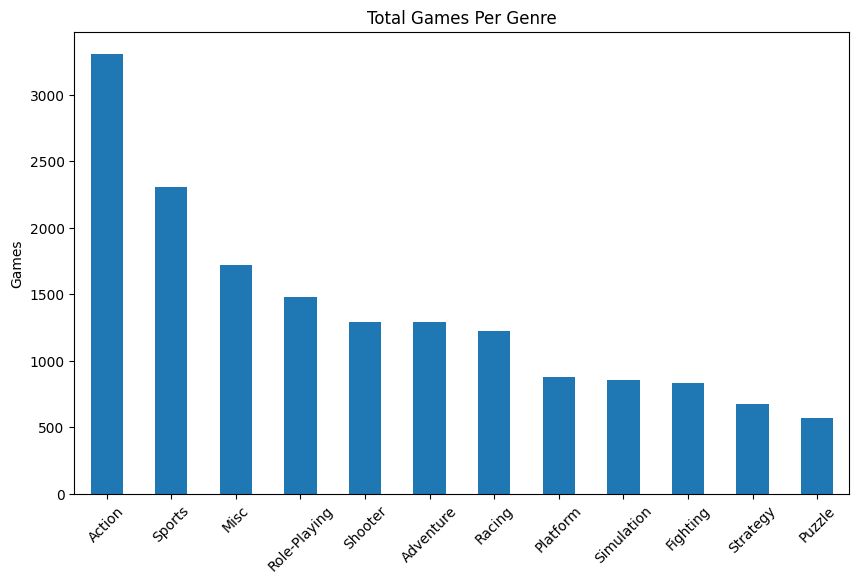

In [48]:
# Visualize genre distribution 
genre_counts = games['genre'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Total Games Per Genre')
plt.ylabel('Games')
plt.xticks(rotation=45)
plt.show()

In [49]:
# Calculate market share for each genre
total_market_sales = games_relevant['total_sales'].sum()
market_share = (genre_sales / total_market_sales) * 100
market_share = market_share.sort_values(ascending = False)
print("Market Share by Genre:")
print("-" * 30)
for genre, share in market_share.items():
    print(f"{genre}: {share:.2f}%")

games_relevant.groupby('genre')['total_sales'].describe()

Market Share by Genre:
------------------------------
Action: 157.38%
Sports: 120.08%
Shooter: 95.48%
Role-Playing: 85.37%
Platform: 75.69%
Misc: 72.46%
Racing: 66.33%
Fighting: 40.59%
Simulation: 35.57%
Puzzle: 21.99%
Adventure: 21.39%
Strategy: 15.82%


,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,766.0,0.420196,1.253909,0.01,0.03,0.110,0.3375,21.05
Adventure,245.0,0.096490,0.216445,0.01,0.02,0.030,0.0700,1.66
Fighting,80.0,0.441375,1.048883,0.01,0.06,0.125,0.3225,7.55
Misc,155.0,0.405290,1.007985,0.01,0.03,0.100,0.3300,9.18
Platform,74.0,0.576081,0.806808,0.01,0.09,0.225,0.6275,4.32
Puzzle,17.0,0.186471,0.325172,0.01,0.02,0.060,0.1100,1.19
Racing,85.0,0.469294,0.964101,0.01,0.05,0.120,0.3800,7.09
Role-Playing,292.0,0.499623,1.353164,0.01,0.06,0.125,0.3825,14.60
Shooter,187.0,1.245882,2.014107,0.01,0.14,0.450,1.4250,14.63


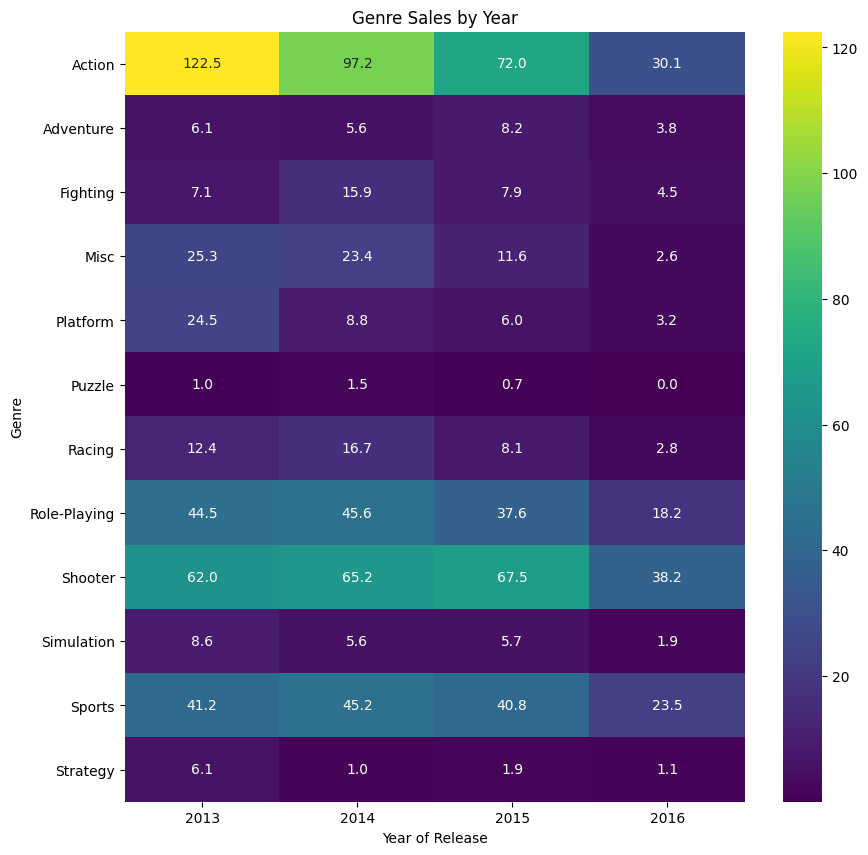

In [50]:
genre_sales_yearly = games_relevant.groupby(['genre', 'year_of_release'])['total_sales'].sum()

genre_sales_pivot = genre_sales_yearly.unstack(fill_value=0)
plt.figure(figsize=(10, 10))
sns.heatmap(genre_sales_pivot, annot=True, cmap='viridis', fmt=".1f")
plt.title('Genre Sales by Year')
plt.xlabel('Year of Release')
plt.ylabel('Genre')
plt.show()

### Key Questions for Genre Analysis:
- Which genres consistently perform well? Action, Sports, Shooter
- Are there any genres showing recent growth or decline? all genres are showing a decline on sales in the last 2 years except shooters they are showing a decline in the last year.
- How does the average performance vary across genres? most genres are around the average sales .485 except strategy and adventure they are way under 

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [51]:
# Function to analyze platform performance by region
def analyze_platform_performance_by_region(data):
    """
    Analyzes how different gaming platforms perform across regions
    """
    platform_regional = data.groupby('platform').agg({
        'na_sales': 'mean',      # North America average
        'eu_sales': 'mean',      # Europe average  
        'jp_sales': 'mean',      # Japan average
        'other_sales': 'mean'    # Other regions average
    }).round(2)
    
    return platform_regional

analyze_platform_performance_by_region(games_relevant)

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
3DS,0.13,0.10,0.22,0.02
DS,0.07,0.11,0.00,0.02
PC,0.06,0.13,0.00,0.02
PS3,0.18,0.20,0.07,0.08
PS4,0.28,0.36,0.04,0.12
PSP,0.00,0.00,0.05,0.00
PSV,0.01,0.02,0.05,0.01
Wii,0.29,0.26,0.00,0.05
WiiU,0.25,0.17,0.09,0.04


In [52]:
# Analyze each region
na_top_platforms = games_relevant.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
eu_top_platforms = games_relevant.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
jp_top_platforms = games_relevant.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
na_top_platforms, eu_top_platforms, jp_top_platforms

(platform
 PS4     108.74
 XOne     93.12
 X360     81.66
 PS3      63.50
 3DS      38.20
 WiiU     29.21
 PC       11.11
 Wii       6.56
 PSV       5.04
 DS        0.57
 PSP       0.00
 Name: na_sales, dtype: float64,
 platform
 PS4     141.09
 PS3      67.81
 XOne     51.59
 X360     42.52
 3DS      30.96
 PC       25.36
 WiiU     19.85
 PSV       6.10
 Wii       5.93
 DS        0.85
 PSP       0.17
 Name: eu_sales, dtype: float64,
 platform
 3DS     67.81
 PS3     23.35
 PSV     18.59
 PS4     15.96
 WiiU    10.88
 PSP      3.29
 X360     0.51
 XOne     0.34
 Wii      0.05
 DS       0.00
 PC       0.00
 Name: jp_sales, dtype: float64)

### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [53]:
# Create a comparative platform analysis
na_platforms = games_relevant.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_platforms = games_relevant.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_platforms = games_relevant.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
total_na_sales = games_relevant['na_sales'].sum()
na_mrkt_share_plat = (na_platforms / total_na_sales * 100).round(2)
total_eu_sales = games_relevant['eu_sales'].sum()
eu_mrkt_share_plat = (eu_platforms / total_eu_sales * 100).round(2)
total_jp_sales = games_relevant['jp_sales'].sum()
jp_mrkt_share_plat = (jp_platforms / total_jp_sales * 100).round(2)
na_mrkt_share_plat, eu_mrkt_share_plat, jp_mrkt_share_plat

(platform
 PS4     24.84
 XOne    21.27
 X360    18.66
 PS3     14.51
 3DS      8.73
 Name: na_sales, dtype: float64,
 platform
 PS4     35.97
 PS3     17.29
 XOne    13.15
 X360    10.84
 3DS      7.89
 Name: eu_sales, dtype: float64,
 platform
 3DS     48.17
 PS3     16.59
 PSV     13.21
 PS4     11.34
 WiiU     7.73
 Name: jp_sales, dtype: float64)

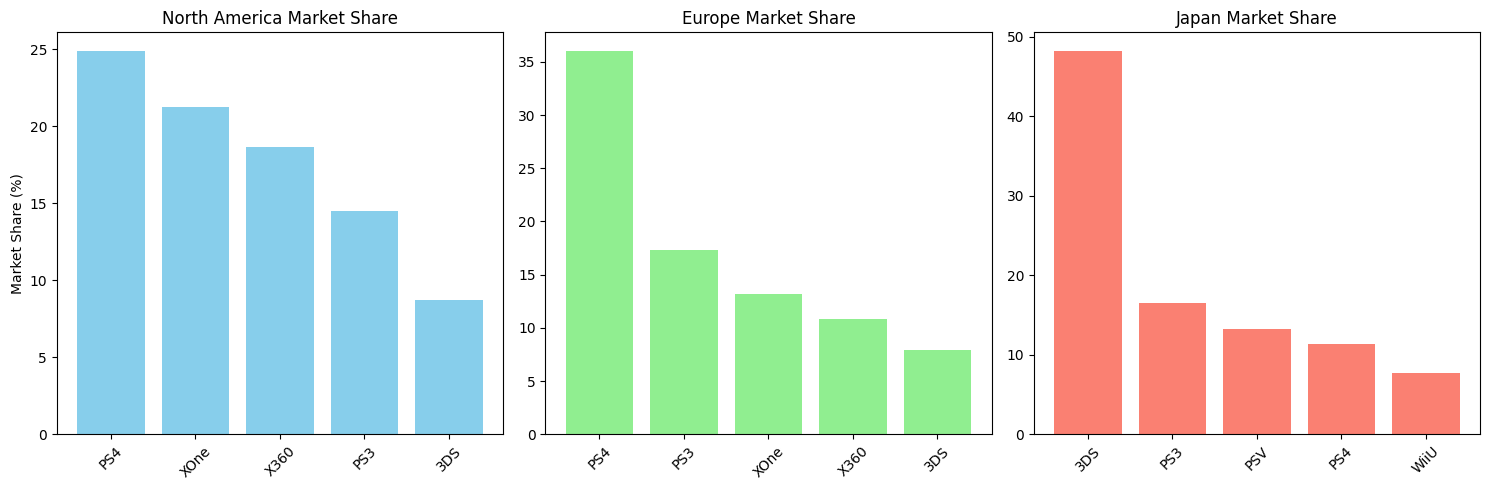

In [54]:
# Visualize cross-regional comparison for top platforms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(na_mrkt_share_plat.index, na_mrkt_share_plat.values, color='skyblue')
axes[0].set_title('North America Market Share')
axes[0].set_ylabel('Market Share (%)')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(eu_mrkt_share_plat.index, eu_mrkt_share_plat.values, color='lightgreen')
axes[1].set_title('Europe Market Share')
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(jp_mrkt_share_plat.index, jp_mrkt_share_plat.values, color='salmon')
axes[2].set_title('Japan Market Share')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [55]:
# Function to analyze genre performance by region
def analyze_genre_by_region(region):
    # Calculate total sales by genre for the specified region
    region_column = f'{region.lower()}_sales'
    genre_sales = games_relevant.groupby('genre')[region_column].sum().sort_values(ascending=False)
    return genre_sales
na_genres = analyze_genre_by_region('NA')
eu_genres = analyze_genre_by_region('EU')
jp_genres = analyze_genre_by_region('JP')

print("North America top genres:")
print(na_genres.head())
print("\nEurope top genres:")
print(eu_genres.head())
print("\nJapan top genres:")
print(jp_genres.head())

North America top genres:
genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

Europe top genres:
genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

Japan top genres:
genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64


### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

In [56]:
# Create a comparative genre analysis
na_genre = games_relevant.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_genre = games_relevant.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_genre = games_relevant.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

na_mrkt_share_gen = (na_genre / total_na_sales * 100).round(2)
eu_mrkt_share_gen = (eu_genre / total_eu_sales * 100).round(2)
jp_mrkt_share_gen = (jp_genre / total_jp_sales * 100).round(2)
na_mrkt_share_gen, eu_mrkt_share_gen, jp_mrkt_share_gen

(genre
 Action          28.80
 Shooter         25.07
 Sports          14.91
 Role-Playing    10.60
 Misc             6.28
 Name: na_sales, dtype: float64,
 genre
 Action          30.12
 Shooter         22.40
 Sports          15.43
 Role-Playing     9.43
 Racing           5.15
 Name: eu_sales, dtype: float64,
 genre
 Role-Playing    36.26
 Action          28.76
 Misc             6.54
 Fighting         5.43
 Shooter          4.70
 Name: jp_sales, dtype: float64)

## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [57]:
# Function to analyze ESRB rating impact
def analyze_esrb_impact():
    # Group games by ESRB rating and calculate metrics
    rating_analysis = games_relevant.groupby('rating').agg({
        'total_sales': ['count', 'sum', 'mean'],
    }).round(2)
    
    return rating_analysis
analyze_esrb_impact()

total_sales              
             count     sum  mean
rating                          
E              302  200.16  0.66
E10+           252  115.39  0.46
M              369  371.68  1.01
T              333  126.62  0.38

In [58]:
# Analyze ESRB impact for each region

def analyze_esrb_impact(data):
    rating_analysis = data.groupby('rating').agg({
        'na_sales': 'mean',      # North America average
        'eu_sales': 'mean',      # Europe average  
        'jp_sales': 'mean',      # Japan average
        'other_sales': 'mean'    # Other regions average
    }).round(2)
    
    return rating_analysis
analyze_esrb_impact(games_relevant)


,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
E,0.26,0.28,0.05,0.07
E10+,0.22,0.17,0.02,0.05
M,0.45,0.39,0.04,0.13
T,0.15,0.13,0.06,0.04


# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


In [59]:
x = games_relevant.loc[games_relevant['platform'].str.lower().isin(['xone']), 'user_score'].dropna().astype(float).values
p = games_relevant.loc[games_relevant['platform'].str.lower().isin(['pc']), 'user_score'].dropna().astype(float).values
alpha= 0.05 # most common alpha 
results = st.ttest_ind(x, p, equal_var = False) #used two-tailed ttest welch's version because you dont assume they are the same value
np.var(x)
print('p-value', results.pvalue)

if (results.pvalue < alpha):
    print('we reject the null hypothesis')
else:
    print("we can't reject the null hypothesis")

# H₀: The mean user rating is the same on Xbox One and PC
# H₁: The means differ 
  

p-value 0.14759594013430463
we can't reject the null hypothesis


In [60]:

action_scores = games_relevant.loc[games_relevant['genre'] == 'Action', 'user_score']
sports_scores = games_relevant.loc[games_relevant['genre'] == 'Sports', 'user_score']
action_clean = action_scores.dropna()
sports_clean = sports_scores.dropna()
alpha= 0.05 # most common alpha 
results = st.ttest_ind(action_clean, sports_clean) #used two-tailed ttest 
np.var(x)
print('p-value', results.pvalue)

if (results.pvalue < alpha):
    print('we reject the null hypothesis')
else:
    print("we can't reject the null hypothesis")

# H₀: Action = Sports(mean user scores are equal)
# H₁: Action ≠ Sports(mean user scores are different)



p-value 1.0517832389140023e-27
we reject the null hypothesis


# Step 6. Write a general conclusion


- All platforms at the moment are on a downward projection but the ones with the most recent spike are XOne, PS4, PC, & WiiU.
- The most popular genres at the moment are action, sports, shooter, platform, & roleplay.  
- Na top consoles by market share PS4 24.84 XOne 21.27 X360 18.66 Sony leads in Na 
- Eu top consoles by market share PS4 35.97 PS3 17.29 XOne 13.15 Sony leads in Eu
- Jp top consoles by market share 3DS 48.17 PS3 16.59 PSV 13.21 Nintendo leads in Jp
- Na top genres market shares Action 28.80 Shooter 25.07 Sports 14.91
- Eu top genres market shares Action 30.12 Shooter 22.40  Sports 15.43
- Jp top genres market shares Role-Playing 36.26 Action 28.76  Misc 6.54
- console ratings that do the best are either E or M the ones in between like T get caught inbetween the other 2 
- platforms to priortize in 2017 are XOne, PS4 , 3DS and WiiU
- Na should perform the best on XOne or PS4 with Action games with M or E rating 
- Eu should perform the best on PS4 with Action games with M rating 
- Jp should perform the best on 3DS or PS4 with Role-playing games with E rating

Japan Strategy: E-rated RPGs
- Aligns with family-friendly culture
- RPGs can be complex and engaging without mature content
- Broader market appeal = higher sales potential

NA/EU Strategy: M-rated Action
- Targets the core gaming demographic (18-35 males)
- M rating signals "serious" gaming experience
- Action games benefit from mature themes (violence, complex stories)

The missing data in reviews i didnt use because i didnt want to skew the data.